## Learning Materials
[MIT: AVL Tree](https://www.youtube.com/watch?v=U1JYwHcFfso&list=PLUl4u3cNGP63EdVPNLG3ToM6LaEUuStEY&index=13)

## Helper functions

In [20]:
import numpy as np
from IPython.display import Image
from graphviz import Digraph
from solution import Node, rightLeftRotation, leftRightRotation, rightRotation, leftRotation

# class Node:
    
#     def __init__(self, value):

#         self.val = value
#         self.right = None
#         self.left = None

 
def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

In [21]:
# test1 = [1, 2, 3, 4, 5, 6, 7, 8]
# test1_tree = buildBinaryTree(test1) # traverse the sorted list via binary search; always balance
# dot = visualize_tree(test1_tree)

# test2 = [-1, 0, 9, 10]
# test2_tree = buildBinaryTree(test2)

# We will make the simpler assumption that all the keys are unique when we are inserting
# test3 = [0, 1, 2, 3, 3, 3, 5]
# test3 = np.unique(test3)
# test3_tree = buildBinaryTree(test3)

## Rotation


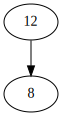

In [56]:
test1 = [12]
left_skewed_tree2 = buildBinaryTree(test1)
insert(left_skewed_tree2, 8)
dot = visualize_tree(left_skewed_tree2)


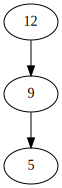

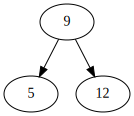

In [60]:

# Inserting a node to the left side of the left node of root node => right rotation
insert(left_skewed_tree2, 5)
dot = visualize_tree(left_skewed_tree2)
dot = visualize_tree(rightRotation(left_skewed_tree2))

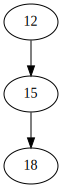

In [15]:
test1 = [12]
right_skewed_tree2 = buildBinaryTree(test1)
insert(right_skewed_tree2, 15)

# Inserting a node to the right side of the right node of root node => left rotation
insert(right_skewed_tree2, 18)
dot = visualize_tree(right_skewed_tree2)


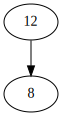

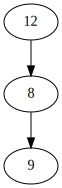

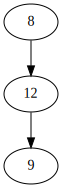

In [59]:
test1 = [12]
left_skewed_tree2 = buildBinaryTree(test1)
insert(left_skewed_tree2, 8)
dot = visualize_tree(left_skewed_tree2)

# Inserting a node to the right side of the left node of root node => left right rotation
insert(left_skewed_tree2, 9)
dot = visualize_tree(left_skewed_tree2)
rotate_tree = rightRotation(left_skewed_tree2)
dot = visualize_tree(rotate_tree)

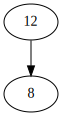

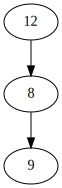

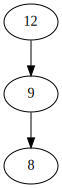

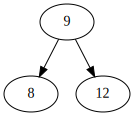

In [55]:
test1 = [12]
left_skewed_tree2 = buildBinaryTree(test1)
insert(left_skewed_tree2, 8)
dot = visualize_tree(left_skewed_tree2)

# Inserting a node to the right side of the left node of root node => left right rotation
insert(left_skewed_tree2, 9)
dot = visualize_tree(left_skewed_tree2)

rotate_tree = leftRotation( left_skewed_tree2.left)
left_skewed_tree2.left = rotate_tree
dot = visualize_tree(left_skewed_tree2)
left_skewed_tree2 = rightRotation( left_skewed_tree2)
dot = visualize_tree(left_skewed_tree2)

In [ ]:
# We need to maintain the balance for all the ancestors after inserting a node into the balanced tree